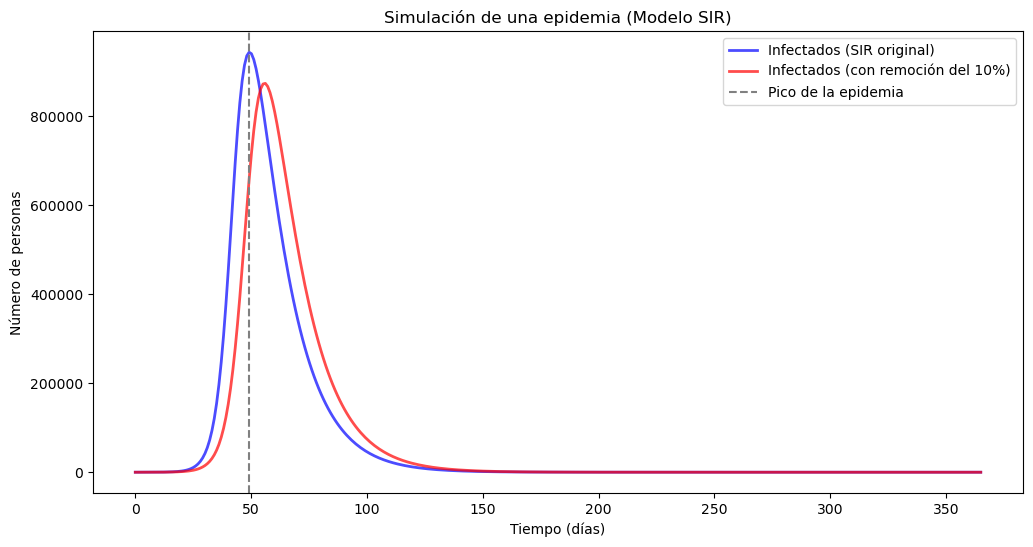

Tiempo para alcanzar el pico de la epidemia: 49.13 días
Fracción de la población no infectada (sin remoción): 0.0077
Fracción de la población no infectada (con remoción del 10%): 0.0129


In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir parámetros
N = 2000000
I0 = 10
S0 = N - I0
R0 = 0
beta = 0.35
gamma = 1/14

# Definir las ecuaciones diferenciales del modelo SIR
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Integrar las ecuaciones del modelo SIR en el tiempo
t = np.linspace(0, 365, 365)  # 1 año de simulación
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Encontrar el tiempo hasta el pico de la epidemia
peak_time = t[np.argmax(I)]

# Calcular la fracción de la población no infectada
uninfected_fraction = S[-1] / N

# Modelar la remoción del X% de los nuevos casos
X = 0.1  # 10% de remoción de nuevos casos
beta_eff = beta - X * beta  # Tasa de contacto efectiva ajustada
ret_eff = odeint(deriv, y0, t, args=(N, beta_eff, gamma))
S_eff, I_eff, R_eff = ret_eff.T
uninfected_fraction_eff = S_eff[-1] / N

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(t, I, 'b', alpha=0.7, linewidth=2, label='Infectados (SIR original)')
plt.plot(t, I_eff, 'r', alpha=0.7, linewidth=2, label='Infectados (con remoción del 10%)')
plt.axvline(x=peak_time, color='gray', linestyle='--', label='Pico de la epidemia')
plt.title('Simulación de una epidemia (Modelo SIR)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de personas')
plt.legend()
plt.show()

print("Tiempo para alcanzar el pico de la epidemia:", round(peak_time, 2), "días")
print("Fracción de la población no infectada (sin remoción):", round(uninfected_fraction, 4))
print("Fracción de la población no infectada (con remoción del 10%):", round(uninfected_fraction_eff, 4))